## Import modules

In [1]:
import numpy as np
import pandas as pd
import os, sys

In [ ]:
from sklearn import datasets, linear_model, preprocessing, neighbors
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC

# import matplotlib.pyplot as plt

## Load data 

In [2]:
df = pd.read_csv('dataset_all/all_F_新北市_A.csv', engine='python')
df.index += 1

In [3]:
new_df = df.copy()
new_df

,Unnamed: 0,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號
1,1,土城區,土地,柑林段117地號,51.98,其他,NaN,NaN,1080418,土地2建物0車位0,...,NaN,0.0,0,NaN,RPQQMLNKNHOFFAF38CA,0.00,0.00,0.00,NaN,NaN
2,2,板橋區,房地(土地+建物),新北市板橋區僑中一街１２４巷１１弄６之４號,21.95,住,NaN,NaN,1080411,土地1建物1車位0,...,NaN,0.0,0,NaN,RPQRMLNKNHOFFAF48CA,65.08,0.00,14.24,NaN,NaN
3,3,土城區,房地(土地+建物),新北市土城區中央路三段２８１巷１１弄２號九樓,10.30,住,NaN,NaN,1080427,土地1建物1車位0,...,NaN,0.0,0,NaN,RPUNMLOKNHOFFAF58CA,47.31,0.00,9.07,NaN,NaN
4,4,板橋區,房地(土地+建物),新北市板橋區大同街２６巷３９號,28.00,住,NaN,NaN,1080407,土地1建物1車位0,...,NaN,0.0,0,地下室及平台增建,RPWNMLOKNHOFFAF78CA,86.33,0.00,0.00,NaN,NaN
5,5,板橋區,房地(土地+建物),新北市板橋區雙十路二段87號18樓之2,13.33,住,NaN,NaN,1080418,土地1建物1車位0,...,NaN,0.0,0,含增建或未登記建物。,RPOOMLOKNHOFFAF08CA,102.34,0.63,12.19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552253,552253,樹林區,房地(土地+建物),新北市樹林區中華路３３號七樓,10.38,都市：其他:第一種住宅區,NaN,NaN,1101104,土地1建物1車位0,...,NaN,0.0,0,NaN,RPWPMLRJKIGGFIF56DA,42.48,1.48,2.82,有,NaN
552254,552254,三峽區,房地(土地+建物),新北市三峽區白雞６８之３０９號三樓之一,28.17,NaN,山坡地保育區,丙種建築用地,1101031,土地1建物1車位0,...,NaN,0.0,0,NaN,RPOPMLNJJIGGFIF87DA,65.43,1.40,8.30,無,NaN
552255,552255,三峽區,土地,插角段有木小段7-28地號,2526.00,NaN,森林區,農牧用地,1101020,土地1建物0車位0,...,NaN,0.0,0,NaN,RPTNMLQKJIGGFIF58DA,0.00,0.00,0.00,無,NaN
552256,552256,樹林區,土地,樹德段280-2地號,35.00,都市：其他:道路用地,NaN,NaN,1101105,土地1建物0車位0,...,NaN,0.0,0,包含公共設施保留地用地；,RPTPMLKKJIGGFIF18DA,0.00,0.00,0.00,無,NaN


## Data processing

In [4]:
new_df['交易年'] = new_df['交易年月日'].astype('str').str[-7:-4].astype('int64')
new_df['交易月'] = new_df['交易年月日'].astype('str').str[-4:-2].astype('int64')

In [5]:
new_df = new_df[[
    '鄉鎮市區', 
    '交易標的',
    '交易年', 
    '交易月',
    '土地移轉總面積平方公尺', 
    '建物移轉總面積平方公尺',
    '車位移轉總面積(平方公尺)',
    '附屬建物面積',
    '主建物面積', 
    '移轉層次', 
    # '總樓層數', 
    '建物型態',
    '主要用途', 
    '建物現況格局-房', 
    '建物現況格局-廳',
    '建物現況格局-衛', 
    '有無管理組織', 
    '車位總價元',
    '總價元', 
    '單價元平方公尺'
    ]]
new_df

,鄉鎮市區,交易標的,交易年,交易月,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積(平方公尺),附屬建物面積,主建物面積,移轉層次,建物型態,主要用途,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,車位總價元,總價元,單價元平方公尺
1,土城區,土地,108,4,51.98,0.00,0.0,0.00,0.00,NaN,其他,NaN,0,0,0,無,0,421038,8100.0
2,板橋區,房地(土地+建物),108,4,21.95,79.32,0.0,0.00,65.08,五層,公寓(5樓含以下無電梯),住家用,2,2,1,無,0,5200000,65557.0
3,土城區,房地(土地+建物),108,4,10.30,72.62,0.0,0.00,47.31,九層,住宅大樓(11層含以上有電梯),住家用,2,2,1,有,0,5380000,74084.0
4,板橋區,房地(土地+建物),108,4,28.00,86.33,0.0,0.00,86.33,一層，平台,公寓(5樓含以下無電梯),住家用,3,2,2,無,0,14300000,165643.0
5,板橋區,房地(土地+建物),108,4,13.33,129.30,0.0,0.63,102.34,十八層,住宅大樓(11層含以上有電梯),住家用,4,2,2,有,0,22800000,176334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552253,樹林區,房地(土地+建物),110,11,10.38,68.85,0.0,1.48,42.48,七層,住宅大樓(11層含以上有電梯),住家用,1,1,1,有,0,8500000,123457.0
552254,三峽區,房地(土地+建物),110,10,28.17,94.07,0.0,1.40,65.43,三層,公寓(5樓含以下無電梯),住家用,2,2,2,無,0,3000000,31891.0
552255,三峽區,土地,110,10,2526.00,0.00,0.0,0.00,0.00,NaN,其他,NaN,0,0,0,無,0,8380000,3317.0
552256,樹林區,土地,110,11,35.00,0.00,0.0,0.00,0.00,NaN,其他,NaN,0,0,0,無,0,5750000,164286.0


In [6]:
con1 = new_df['交易標的'].str.contains("建物") # contain building
con2 = new_df['主要用途'] == '住家用' # target for living
con3 = new_df['建物型態'].str.contains('|'.join(["住宅大樓", "公寓", "華夏", "套房", "透天厝"])) # type of building
con4 = new_df['交易標的'].str.contains("車位") & (new_df['車位總價元'] == 0) # include garage but lack of price
con5 = new_df['移轉層次'].str.len() > 4 # complex floor-description
new_df = new_df.loc[con1 & con2 & con3 & ~con4 & ~con5]
new_df = new_df.drop(['主要用途'], axis = 1)

In [7]:
garage_col = new_df['交易標的'].str.contains("車位")
garage_df = new_df[garage_col]
new_df = new_df[~garage_col]

In [10]:
no_ga_df = new_df.drop(['車位總價元', '車位移轉總面積(平方公尺)'], axis = 1)

In [8]:
# price problem
garage_df

,鄉鎮市區,交易標的,交易年,交易月,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積(平方公尺),附屬建物面積,主建物面積,移轉層次,建物型態,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,車位總價元,總價元,單價元平方公尺
175,新莊區,房地(土地+建物)+車位,108,4,6.67,92.94,18.41,1.21,51.33,九層,住宅大樓(11層含以上有電梯),2,1,1,有,1000000,7980000,93654.0
181,新店區,房地(土地+建物)+車位,108,4,15.13,161.13,27.18,0.53,85.12,二層,住宅大樓(11層含以上有電梯),4,2,2,有,1600000,16880000,114072.0
184,汐止區,房地(土地+建物)+車位,108,4,12.71,144.69,0.00,0.00,72.72,八層,住宅大樓(11層含以上有電梯),3,2,1,有,1200000,5930000,40984.0
189,蘆洲區,房地(土地+建物)+車位,108,4,28.46,156.23,23.36,2.25,83.94,十一層,住宅大樓(11層含以上有電梯),3,2,2,有,2000000,17000000,112892.0
193,蘆洲區,房地(土地+建物)+車位,108,4,27.27,174.42,30.64,1.05,87.15,五層,住宅大樓(11層含以上有電梯),3,2,2,有,2000000,20600000,129364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552231,鶯歌區,房地(土地+建物)+車位,109,3,24.99,156.14,33.97,4.61,68.33,十一層,住宅大樓(11層含以上有電梯),3,2,2,有,1350000,10360000,73750.0
552232,鶯歌區,房地(土地+建物)+車位,108,10,17.32,117.91,33.97,2.19,45.49,三層,住宅大樓(11層含以上有電梯),2,1,2,有,1200000,6900000,67906.0
552234,鶯歌區,房地(土地+建物)+車位,108,10,17.96,121.15,33.97,2.36,47.97,五層,住宅大樓(11層含以上有電梯),2,2,1,有,1300000,7550000,71691.0
552239,中和區,房地(土地+建物)+車位,110,11,22.35,137.86,31.63,1.73,61.77,十一層,住宅大樓(11層含以上有電梯),2,2,2,有,2000000,17700000,147793.0


In [11]:
no_ga_df

,鄉鎮市區,交易標的,交易年,交易月,土地移轉總面積平方公尺,建物移轉總面積平方公尺,附屬建物面積,主建物面積,移轉層次,建物型態,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,總價元,單價元平方公尺
2,板橋區,房地(土地+建物),108,4,21.95,79.32,0.00,65.08,五層,公寓(5樓含以下無電梯),2,2,1,無,5200000,65557.0
3,土城區,房地(土地+建物),108,4,10.30,72.62,0.00,47.31,九層,住宅大樓(11層含以上有電梯),2,2,1,有,5380000,74084.0
5,板橋區,房地(土地+建物),108,4,13.33,129.30,0.63,102.34,十八層,住宅大樓(11層含以上有電梯),4,2,2,有,22800000,176334.0
8,板橋區,房地(土地+建物),108,3,33.00,73.86,0.00,73.86,四層,公寓(5樓含以下無電梯),3,2,1,無,8000000,108313.0
9,土城區,房地(土地+建物),108,3,8.65,106.44,0.95,68.08,十九層,住宅大樓(11層含以上有電梯),3,2,2,有,10530000,98929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552248,三峽區,房地(土地+建物),110,11,7.84,85.21,1.76,66.03,十五層,住宅大樓(11層含以上有電梯),3,1,1,有,8350000,97993.0
552249,鶯歌區,房地(土地+建物),110,11,36.00,84.26,17.08,67.18,一層,公寓(5樓含以下無電梯),2,1,1,無,7000000,83076.0
552253,樹林區,房地(土地+建物),110,11,10.38,68.85,1.48,42.48,七層,住宅大樓(11層含以上有電梯),1,1,1,有,8500000,123457.0
552254,三峽區,房地(土地+建物),110,10,28.17,94.07,1.40,65.43,三層,公寓(5樓含以下無電梯),2,2,2,無,3000000,31891.0


## Label encoding

### Floor encoding

In [12]:
no_ga_df = no_ga_df.groupby("移轉層次").filter(lambda grep: len(grep) > 100)
no_ga_df['移轉層次'] = no_ga_df['移轉層次'].str[:2]
no_ga_df['移轉層次']

2         五層
3         九層
5         十八
8         四層
9         十九
          ..
552248    十五
552249    一層
552253    七層
552254    三層
552257    十一
Name: 移轉層次, Length: 128273, dtype: object

In [13]:
no_ga_df['移轉層次'] = no_ga_df['移轉層次'].str[:2]

In [14]:
new_floor = {"移轉層次":
             {"全" : 0,
              "一層" : 1, 
              "二層" : 2, 
              "三層" : 3, 
              "四層" : 4, 
              "五層" : 5, 
              "六層" : 6, 
              "七層" : 7, 
              "八層" : 8, 
              "九層" : 9, 
              "十層" : 10, 
              "十一" : 11, 
              "十二" : 12, 
              "十三" : 13, 
              "十四" : 14, 
              "十五" : 15, 
              "十六" : 16, 
              "十七" : 17, 
              "十八" : 18, 
              "十九" : 19, 
              "二十" : 20
             }
            }

In [15]:
no_ga_df = no_ga_df.replace(new_floor)
no_ga_df

,鄉鎮市區,交易標的,交易年,交易月,土地移轉總面積平方公尺,建物移轉總面積平方公尺,附屬建物面積,主建物面積,移轉層次,建物型態,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,總價元,單價元平方公尺
2,板橋區,房地(土地+建物),108,4,21.95,79.32,0.00,65.08,5,公寓(5樓含以下無電梯),2,2,1,無,5200000,65557.0
3,土城區,房地(土地+建物),108,4,10.30,72.62,0.00,47.31,9,住宅大樓(11層含以上有電梯),2,2,1,有,5380000,74084.0
5,板橋區,房地(土地+建物),108,4,13.33,129.30,0.63,102.34,18,住宅大樓(11層含以上有電梯),4,2,2,有,22800000,176334.0
8,板橋區,房地(土地+建物),108,3,33.00,73.86,0.00,73.86,4,公寓(5樓含以下無電梯),3,2,1,無,8000000,108313.0
9,土城區,房地(土地+建物),108,3,8.65,106.44,0.95,68.08,19,住宅大樓(11層含以上有電梯),3,2,2,有,10530000,98929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552248,三峽區,房地(土地+建物),110,11,7.84,85.21,1.76,66.03,15,住宅大樓(11層含以上有電梯),3,1,1,有,8350000,97993.0
552249,鶯歌區,房地(土地+建物),110,11,36.00,84.26,17.08,67.18,1,公寓(5樓含以下無電梯),2,1,1,無,7000000,83076.0
552253,樹林區,房地(土地+建物),110,11,10.38,68.85,1.48,42.48,7,住宅大樓(11層含以上有電梯),1,1,1,有,8500000,123457.0
552254,三峽區,房地(土地+建物),110,10,28.17,94.07,1.40,65.43,3,公寓(5樓含以下無電梯),2,2,2,無,3000000,31891.0


### Price encoding

In [16]:
# define function for classifying
def price_transform(df):
    value = df['每坪價格']
    if value < 10:
        res = 0
    elif value < 20:
        res = 1
    elif value < 30:
        res = 2
    elif value < 40:
        res = 3
    elif value < 50:
        res = 4
    elif value < 60:
        res = 5
    elif value < 70:
        res = 6
    elif value < 80:
        res = 7
    elif value < 90:
        res = 8
    elif value < 100:
        res = 9
    else:
        res = 10
    return res

#create new column using the function above
no_ga_df['每坪價格'] = (no_ga_df['單價元平方公尺'] * 3.3058) / 10000
no_ga_df['價格分類'] = no_ga_df.apply(price_transform, axis=1)

no_ga_df

,鄉鎮市區,交易標的,交易年,交易月,土地移轉總面積平方公尺,建物移轉總面積平方公尺,附屬建物面積,主建物面積,移轉層次,建物型態,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,總價元,單價元平方公尺,每坪價格,價格分類
2,板橋區,房地(土地+建物),108,4,21.95,79.32,0.00,65.08,5,公寓(5樓含以下無電梯),2,2,1,無,5200000,65557.0,21.671833,2
3,土城區,房地(土地+建物),108,4,10.30,72.62,0.00,47.31,9,住宅大樓(11層含以上有電梯),2,2,1,有,5380000,74084.0,24.490689,2
5,板橋區,房地(土地+建物),108,4,13.33,129.30,0.63,102.34,18,住宅大樓(11層含以上有電梯),4,2,2,有,22800000,176334.0,58.292494,5
8,板橋區,房地(土地+建物),108,3,33.00,73.86,0.00,73.86,4,公寓(5樓含以下無電梯),3,2,1,無,8000000,108313.0,35.806112,3
9,土城區,房地(土地+建物),108,3,8.65,106.44,0.95,68.08,19,住宅大樓(11層含以上有電梯),3,2,2,有,10530000,98929.0,32.703949,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552248,三峽區,房地(土地+建物),110,11,7.84,85.21,1.76,66.03,15,住宅大樓(11層含以上有電梯),3,1,1,有,8350000,97993.0,32.394526,3
552249,鶯歌區,房地(土地+建物),110,11,36.00,84.26,17.08,67.18,1,公寓(5樓含以下無電梯),2,1,1,無,7000000,83076.0,27.463264,2
552253,樹林區,房地(土地+建物),110,11,10.38,68.85,1.48,42.48,7,住宅大樓(11層含以上有電梯),1,1,1,有,8500000,123457.0,40.812415,4
552254,三峽區,房地(土地+建物),110,10,28.17,94.07,1.40,65.43,3,公寓(5樓含以下無電梯),2,2,2,無,3000000,31891.0,10.542527,1


### Distinct & Building-type encoding

In [19]:
no_ga_df["建物型態"].value_counts()

1    55095
0    51810
2    12171
3     9197
Name: 建物型態, dtype: int64

In [17]:
# Label encoding
no_ga_df["鄉鎮市區"] = pd.Categorical(no_ga_df["鄉鎮市區"]).codes
no_ga_df["建物型態"] = pd.Categorical(no_ga_df["建物型態"]).codes
no_ga_df

,鄉鎮市區,交易標的,交易年,交易月,土地移轉總面積平方公尺,建物移轉總面積平方公尺,附屬建物面積,主建物面積,移轉層次,建物型態,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,總價元,單價元平方公尺,每坪價格,價格分類
2,11,房地(土地+建物),108,4,21.95,79.32,0.00,65.08,5,1,2,2,1,無,5200000,65557.0,21.671833,2
3,6,房地(土地+建物),108,4,10.30,72.62,0.00,47.31,9,0,2,2,1,有,5380000,74084.0,24.490689,2
5,11,房地(土地+建物),108,4,13.33,129.30,0.63,102.34,18,0,4,2,2,有,22800000,176334.0,58.292494,5
8,11,房地(土地+建物),108,3,33.00,73.86,0.00,73.86,4,1,3,2,1,無,8000000,108313.0,35.806112,3
9,6,房地(土地+建物),108,3,8.65,106.44,0.95,68.08,19,0,3,2,2,有,10530000,98929.0,32.703949,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552248,0,房地(土地+建物),110,11,7.84,85.21,1.76,66.03,15,0,3,1,1,有,8350000,97993.0,32.394526,3
552249,28,房地(土地+建物),110,11,36.00,84.26,17.08,67.18,1,1,2,1,1,無,7000000,83076.0,27.463264,2
552253,13,房地(土地+建物),110,11,10.38,68.85,1.48,42.48,7,0,1,1,1,有,8500000,123457.0,40.812415,4
552254,0,房地(土地+建物),110,10,28.17,94.07,1.40,65.43,3,1,2,2,2,無,3000000,31891.0,10.542527,1


### Transaction & Building manager

In [20]:
# One-hot encoding
no_ga_df = pd.get_dummies(no_ga_df)
model_df = pd.DataFrame(no_ga_df)
model_df

,鄉鎮市區,交易年,交易月,土地移轉總面積平方公尺,建物移轉總面積平方公尺,附屬建物面積,主建物面積,移轉層次,建物型態,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價元平方公尺,每坪價格,價格分類,交易標的_建物,交易標的_房地(土地+建物),有無管理組織_有,有無管理組織_無
2,11,108,4,21.95,79.32,0.00,65.08,5,1,2,2,1,5200000,65557.0,21.671833,2,0,1,0,1
3,6,108,4,10.30,72.62,0.00,47.31,9,0,2,2,1,5380000,74084.0,24.490689,2,0,1,1,0
5,11,108,4,13.33,129.30,0.63,102.34,18,0,4,2,2,22800000,176334.0,58.292494,5,0,1,1,0
8,11,108,3,33.00,73.86,0.00,73.86,4,1,3,2,1,8000000,108313.0,35.806112,3,0,1,0,1
9,6,108,3,8.65,106.44,0.95,68.08,19,0,3,2,2,10530000,98929.0,32.703949,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552248,0,110,11,7.84,85.21,1.76,66.03,15,0,3,1,1,8350000,97993.0,32.394526,3,0,1,1,0
552249,28,110,11,36.00,84.26,17.08,67.18,1,1,2,1,1,7000000,83076.0,27.463264,2,0,1,0,1
552253,13,110,11,10.38,68.85,1.48,42.48,7,0,1,1,1,8500000,123457.0,40.812415,4,0,1,1,0
552254,0,110,10,28.17,94.07,1.40,65.43,3,1,2,2,2,3000000,31891.0,10.542527,1,0,1,0,1


In [ ]:
model_df.describe()

## Draw HeatMap

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

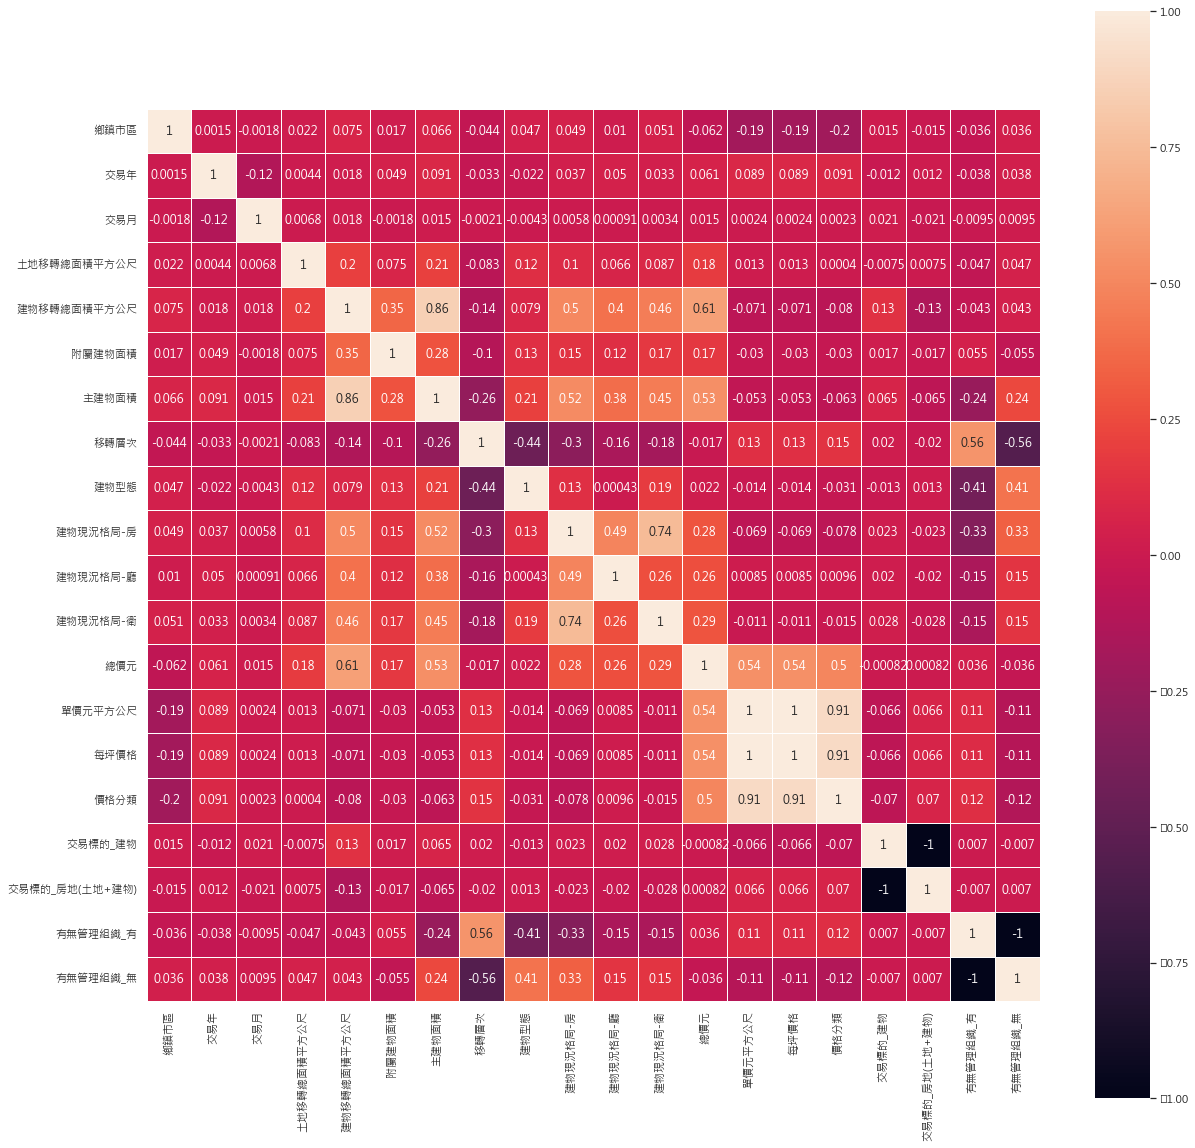

In [25]:
#圖形大小
plt.figure(figsize=(20,20))

# #替圖表顯示中文
sns.set(font=['sans-serif'])
sns.set_style("dark",{"font.sans-serif":['Microsoft JhengHei']})

# df.corr(),預設值是pearson
sns.heatmap(model_df.corr(), linewidths = 0.5, vmax = 1.0, square = True, linecolor = 'white', annot = True) 

## Supervised learning

In [ ]:
model_df.columns

In [ ]:
model_df

### Standardize data

In [ ]:
X = model_df.drop(['價格分類', '總價元', '單價元平方公尺', '每坪價格'], axis=1)
y = model_df["價格分類"]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
print(scaler)

### Linear Regression

In [ ]:
# linear regression
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
          
# make predictions
data_X_test = scaler.transform(X_test)
data_y_pred = model.predict(y_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(data_y_test, data_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(data_y_test, data_y_pred)))     

### Logistic Regression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1) #random_state 種子值

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model=LogisticRegression()
model.fit(X_train,y_train)

X_test_nor = scaler.transform(X_test)
y_pred = model.predict(X_test_nor)
accuracy = accuracy_score(y_test, y_pred)

print(model.coef_)
#print prediction result
print(y_pred)
#print accuracy 
print(accuracy)

### K-Nearest Neighbor 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = neighbors.KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: {}'.format(con_matrix))

### Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
#scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = GaussianNB()
#model = MultinomialNB()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))

### SVM

In [ ]:
# we can change kernel to rbf, poly, linear
model = SVC(kernel='sigmoid', C=1.0, verbose=True)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))

### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))